## Matplotlib을 통한 다양한 시각화


In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

E: dpkg was interrupted, you must manually run 'dpkg --configure -a' to correct the problem. 


In [0]:
# 우선 실행해 주세요
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm

# 2. 나눔 폰트의 위치 가져오기 
system_font = fm.findSystemFonts() # 현재 시스템에 설치된 폰트
nanum_fonts = [font for font in system_font 
               if "NanumBarunGothic.ttf" in font]
font_path = nanum_fonts[0] # 설정할 폰트의 경로

# 3. 나눔 폰트로 설정하기
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc("font",family=font_name)

# 4. 폰트 재설정하기
fm._rebuild()

# 5. (optional) minus 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False


## 예제 데이터 )  학생들의 국영수사과 성적표



#### 데이터 1) 중간고사, 학생들의 국영수사과 성적표

| 학생 번호 | 국어 | 영어 | 수학 | 사회 | 과학 |
|  ----   | --- |---| --- | --- | --- |
|0 |80 |92 |70 | 65 | 92 |
|1 |91 |75 |90 | 68 | 85 | 
|2 |86 |76 |42 | 72 | 88 |
|3 |77 |92 |52 | 60 | 80 |
|4 |75 |85 |85 | 92 | 95 |
|5 |96 |90 |95 | 81 | 72 |

#### 데이터 2) 기말고사, 학생들의 국영수사과 성적표

| 학생 번호 | 국어 | 영어 | 수학 | 사회 | 과학 |
|  ----   | --- |---| --- | --- | --- |
|0 |85 |95 |90 | 66 | 93 |
|1 |93 |70 |80 | 60 | 81 | 
|2 |89 |78 |55 | 75 | 80 |
|3 |80 |94 |59 | 72 | 90 |
|4 |70 |82 |81 | 95 | 72 |
|5 |90 |76 |93 | 82 | 89 |

In [3]:
middle_scores = np.array([
    [80,92,70,65,92],
    [91,75,90,68,85],
    [86,76,42,72,88],
    [77,92,52,60,80],
    [75,85,85,92,95],
    [96,90,95,81,72]
])

final_scores = np.array([
    [85,95,90,66,93],
    [93,70,80,60,81],
    [89,78,55,75,80],
    [80,94,59,72,90],
    [70,82,81,95,72],
    [90,76,93,82,89]
])

scores = np.stack([middle_scores,final_scores])

scores

array([[[80, 92, 70, 65, 92],
        [91, 75, 90, 68, 85],
        [86, 76, 42, 72, 88],
        [77, 92, 52, 60, 80],
        [75, 85, 85, 92, 95],
        [96, 90, 95, 81, 72]],

       [[85, 95, 90, 66, 93],
        [93, 70, 80, 60, 81],
        [89, 78, 55, 75, 80],
        [80, 94, 59, 72, 90],
        [70, 82, 81, 95, 72],
        [90, 76, 93, 82, 89]]])

## 문제 1) 학생별 평균 성적

* 중간고사 때와 기말고사 때를 나누어서, 학생 별 평균 성적을 아래처럼 그려주세요
![Imgur](https://i.imgur.com/djeTUDq.png)

**조건**

1. 제목은 `학생 별 평균 성적`로 해주세요.
3. y축의 범위는 `50~100`로 해주세요.
4. x축의 이름은 `학생번호`로 해주세요.
5. y축의 이름은 `평균성적`로 해주세요.
6. 범례를 `중간고사`,`기말고사`으로 추가해주세요.

In [0]:
# 우선 실행해주세요
scores = np.stack([middle_scores,final_scores])

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과 그림이 위와 동일하도록 만들어 주세요

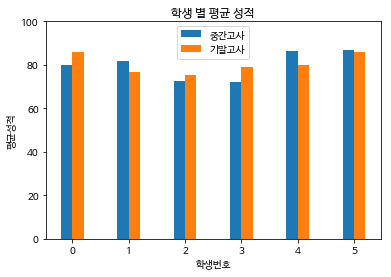

In [5]:
# 답안지를 작성해 주세요.

plt.ylim((0,100))
plt.bar(x=np.arange(len(middle_scores))-0.1, height=middle_scores.mean(axis=1), width=0.2) 
plt.bar(x=np.arange(len(final_scores))+0.1, height=final_scores.mean(axis=1), width=0.2)
plt.xlabel('학생번호')
plt.ylabel('평균성적')
plt.legend(['중간고사', '기말고사'])
plt.title('학생 별 평균 성적')

plt.show()

## 문제 2) 모든 학생의 오답 비중

* 중간고사 때 각 학생 별로 틀린 총 오답 점수의 비중을 아래와 같이, 파이 그래프로 그려보세요
![Imgur](https://i.imgur.com/7ImUBIj.png)

In [0]:
# 우선 실행해주세요
error_scores = 100 - middle_scores
label_names = np.array(["국어","영어","수학","사회","과학"])

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과 그림이 위와 동일하도록 만들어 주세요

In [7]:
error_scores

array([[20,  8, 30, 35,  8],
       [ 9, 25, 10, 32, 15],
       [14, 24, 58, 28, 12],
       [23,  8, 48, 40, 20],
       [25, 15, 15,  8,  5],
       [ 4, 10,  5, 19, 28]])

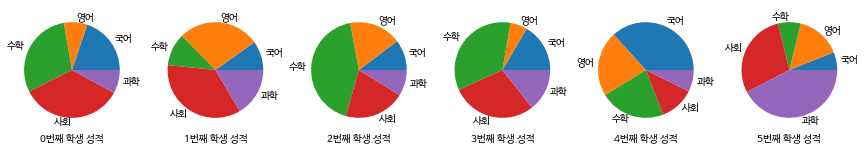

In [8]:
# 답안지를 작성해 주세요.
size = len(error_scores)
fig, axes = plt.subplots(1, size)
fig.set_size_inches((15, 30))
for i in range(size):
    axes[i].pie(error_scores[i], labels = label_names)
    axes[i].set_xlabel(f'{i}번째 학생 성적')
plt.show()

## 문제 3) 히스토그램 

* 아래는 한 반의 학생들 성적이다. 이를 히스토그램으로 나타내어보자.
```
[ 88,  78,  83,  35, 100,  71,  38,  98,  73,  41,  72,  83,  98,
  98,  91,  68,  62,  59,  68,  86,  89,  98,  64,  71,  59,  55,
  50,  55,  45,  66,  75,  77,  68,  75,  66,  75,  40,  25,  63,
  71, 100,  49,  42,  98,  65,  93,  67,  53,  42,  83]
```
![Imgur](https://i.imgur.com/sUQssma.png)

In [0]:
# 우선 실행해주세요
class_scores = np.array([ 
88,  78,  83,  35, 100,  71,  38,  98,  73,  41,  72,  83,  98,
98,  91,  68,  62,  59,  68,  86,  89,  98,  64,  71,  59,  55,
50,  55,  45,  66,  75,  77,  68,  75,  66,  75,  40,  25,  63,
71, 100,  49,  42,  98,  65,  93,  67,  53,  42,  83])

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과 그림이 위와 동일하도록 만들어 주세요

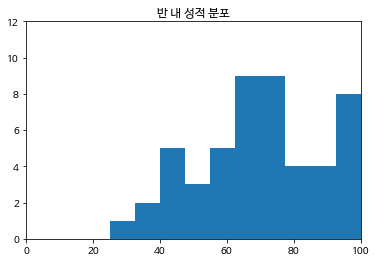

In [10]:
# 답안지를 작성해 주세요.
fig, ax = plt.subplots(1,1)
ax.hist(class_scores)
ax.set_xlim((0, 100))
ax.set_ylim((0, 12))
ax.set_title('반 내 성적 분포')
plt.show()

## 문제 4) 중간/기말 고사 성적 산포도

* 중간고사과 기말고사의 관계를 추론하기 위해 아래와 같이 산포도를 그려 주세요

![Imgur](https://i.imgur.com/Zacho9Y.png)

In [0]:
# 우선 실행해주세요
avg_scores = scores.mean(axis=2)

mid_scores = avg_scores[0] # 중간고사 학생 별 평균성적
final_scores = avg_scores[1] # 기말고사 학생 별 평균성적

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과 그림이 위와 동일하도록 만들어 주세요

Text(0, 0.5, '기말고사 학생 평균 점수')

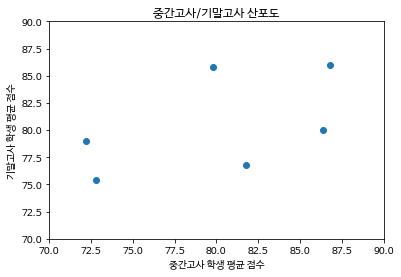

In [12]:
# 답안지를 작성해 주세요.
plt.scatter(mid_scores, final_scores)
plt.xlim((70.0, 90.0))
plt.ylim((70.0, 90.0))

plt.title('중간고사/기말고사 산포도')
plt.xlabel('중간고사 학생 평균 점수')
plt.ylabel('기말고사 학생 평균 점수')